1) Create regression model using different regression algorithms (mpg is target )<br>2) Print accuracy score of each.

#### Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.metrics import r2_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading data from CSV file into pandas DataFrame
df = pd.read_csv('auto_mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
df.columns = df.columns.str.title()

#### Inspecting

In [4]:
#Checking Shape
df.shape

(398, 9)

In [5]:
#checking duplicates
df.duplicated().sum()

0

In [6]:
df[df.duplicated(subset=["Car Name",'Origin','Model Year'],keep = False)]

,Mpg,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
168,23.0,4,140.0,83,2639,17.0,75,1,ford pinto
174,18.0,6,171.0,97,2984,14.5,75,1,ford pinto
338,27.2,4,135.0,84,2490,15.7,81,1,plymouth reliant
342,30.0,4,135.0,84,2385,12.9,81,1,plymouth reliant


dropping duplicates *same car name ,model year and origin* with different data

In [7]:
# df.drop_duplicates(subset=["Car Name",'Origin','Model Year'],inplace=True)

In [8]:
# Printing information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Mpg           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    object 
 4   Weight        398 non-null    int64  
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
 8   Car Name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [9]:
# Convert argument to a numeric type, (error = "coerce") will convert tHe invalid parsing into NAN
df["Horsepower"] = pd.to_numeric(df["Horsepower"], errors = "coerce")

In [10]:
# Checking null values
df.isna().sum()

Mpg             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
Car Name        0
dtype: int64

<AxesSubplot:xlabel='Horsepower', ylabel='count'>

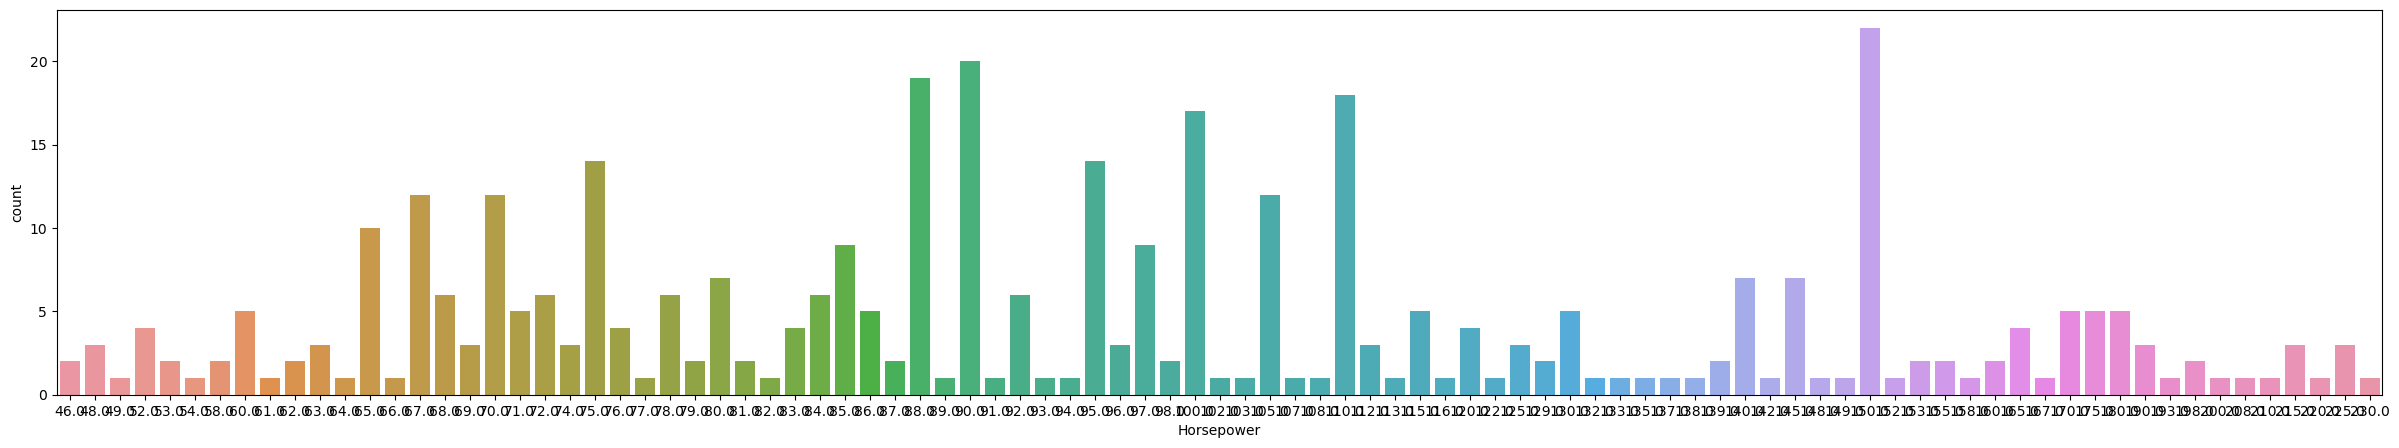

In [11]:
#Checking the count of horsepower
plt.figure(figsize=(30,5))
sns.countplot(df["Horsepower"])

<AxesSubplot:xlabel='Horsepower', ylabel='Count'>

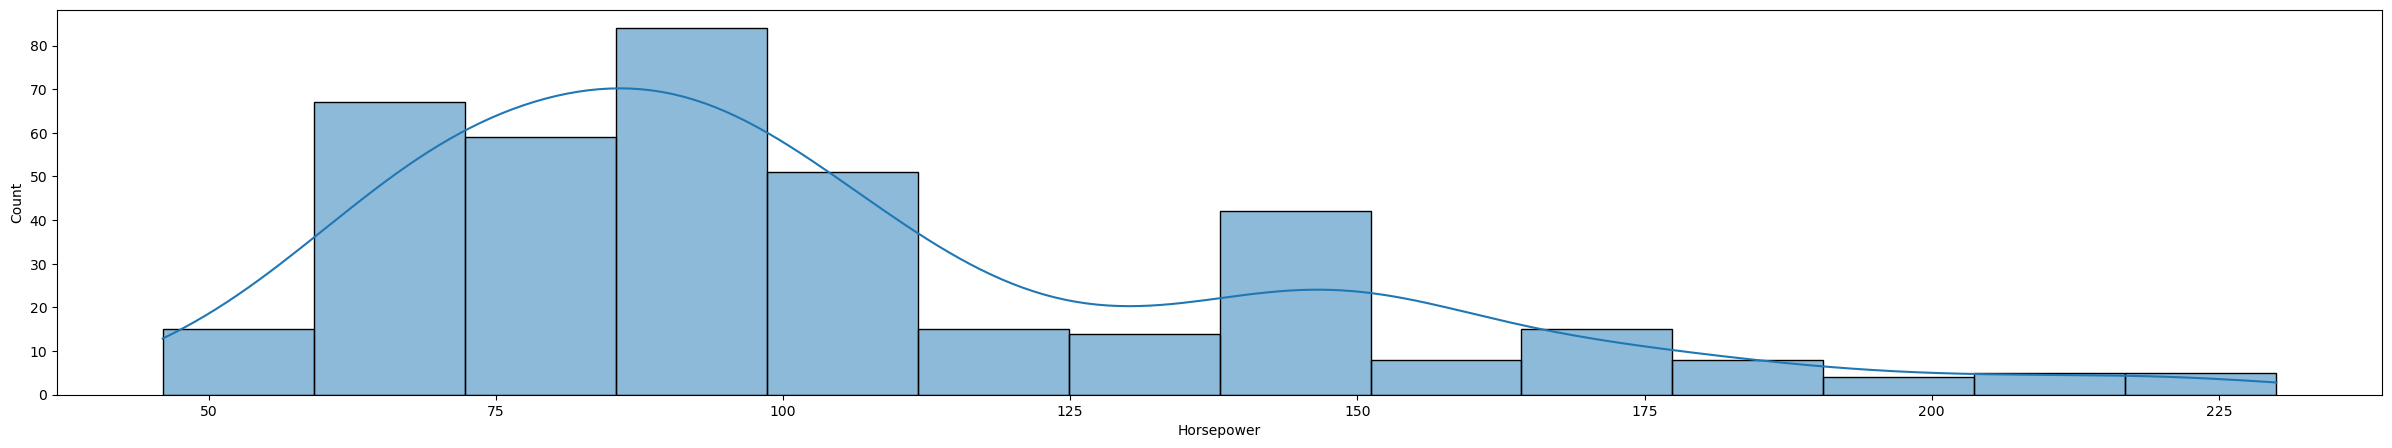

In [12]:
#Checking the ditribution of horsepower
plt.figure(figsize=(30,5))
sns.histplot(df["Horsepower"],kde=True)

<AxesSubplot:xlabel='Horsepower'>

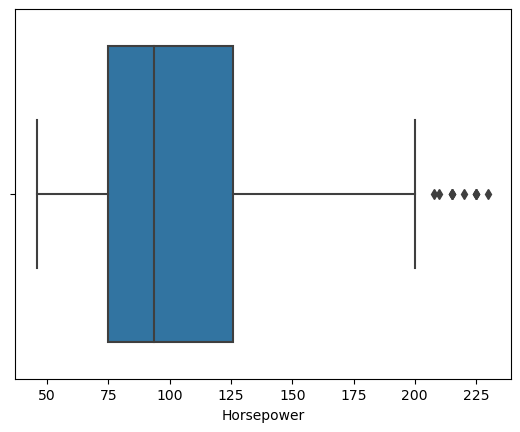

In [13]:
#Checking outliers
sns.boxplot(data=df,x="Horsepower")

Here applying median to fill the null values in horse power because , mode/mean will create asymmetry due to the outliers

In [14]:
#Applying median
df['Horsepower'] = df['Horsepower'].fillna(df['Horsepower'].median())

In [15]:
df['Origin']=df['Origin'].astype('object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Mpg           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    float64
 4   Weight        398 non-null    int64  
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    object 
 8   Car Name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [17]:
# #checking Unique values
# for col in df.select_dtypes(include='number'):
#     print(col,":",df[col].value_counts())
#     print("")

### Outlier detection

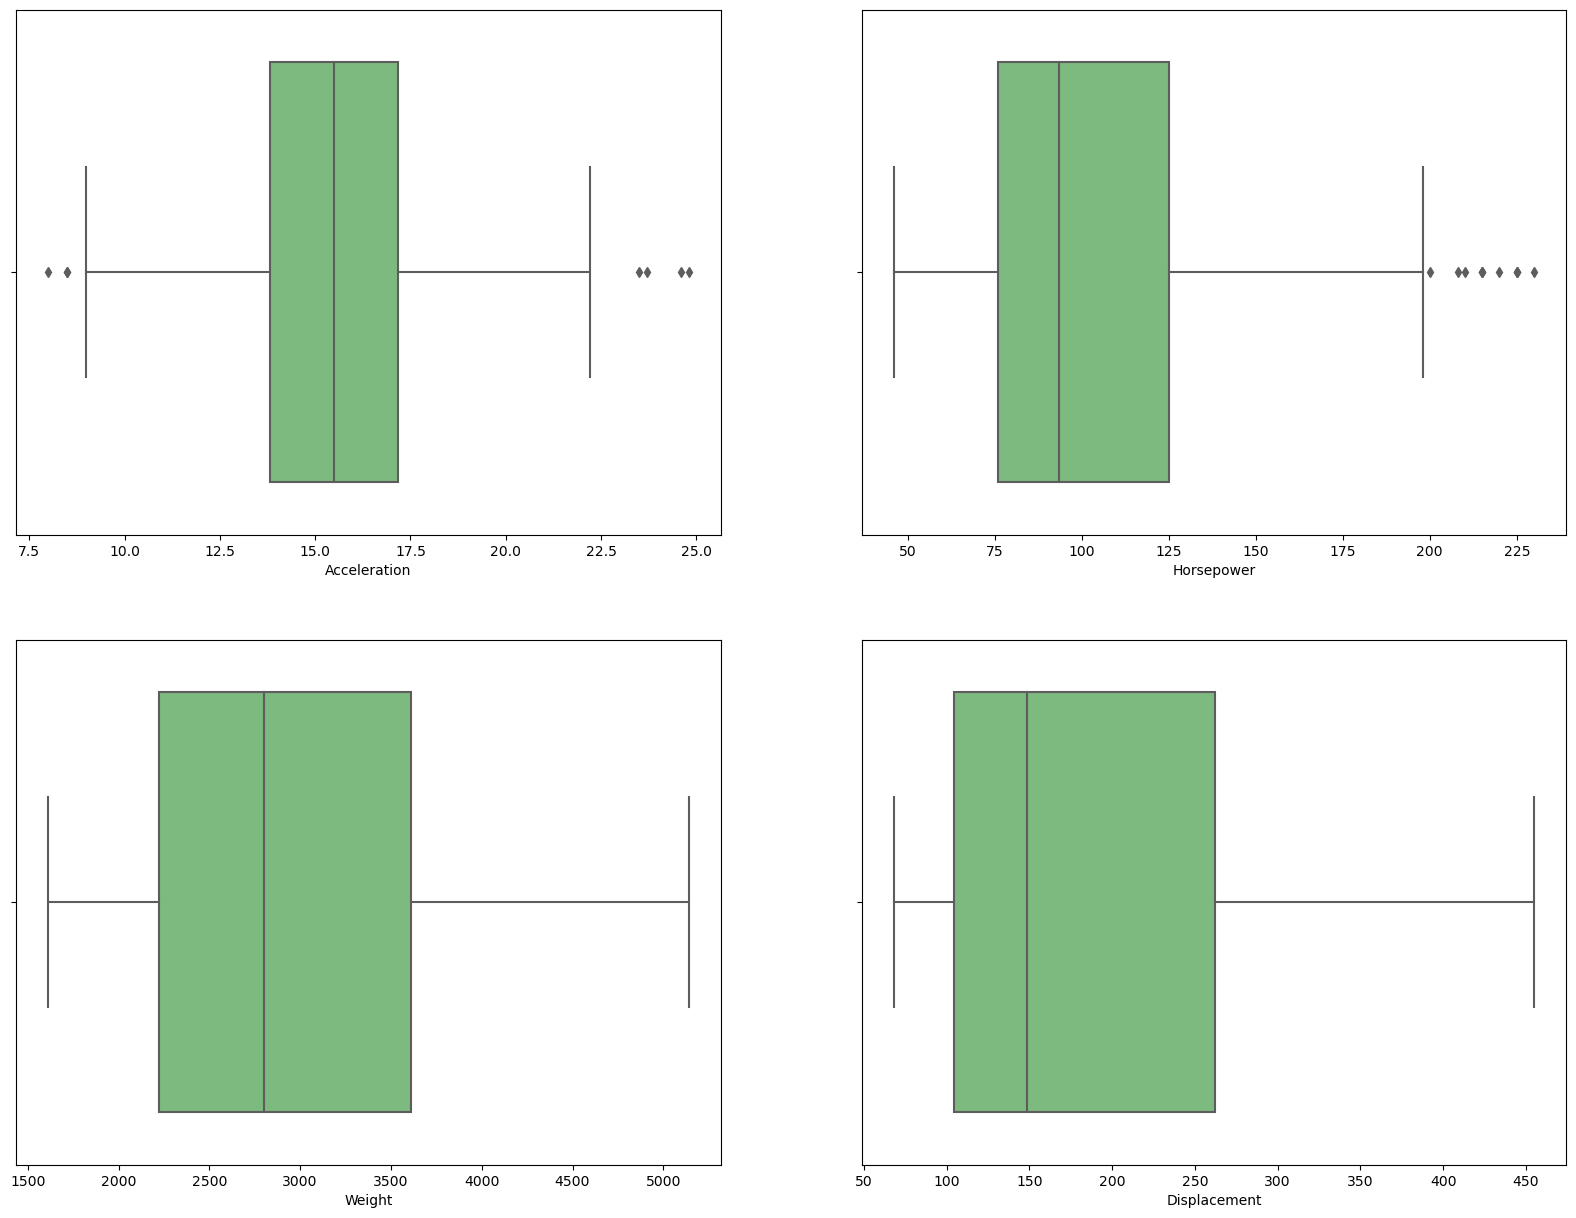

In [18]:
col = ["Acceleration", "Horsepower", "Weight", "Displacement"]
plt.figure(figsize=(20,15))
for i,col in enumerate(col):
    plt.subplot(2,2,i+1)
    sns.boxplot(data=df,x=col,palette="Greens")

    

In [19]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outlier = ((df < lower_bound ) | (df > upper_bound))



In [20]:
outlier.sum()

Acceleration     7
Car Name         0
Cylinders        0
Displacement     0
Horsepower      11
Model Year       0
Mpg              1
Origin           0
Weight           0
dtype: int64

In [21]:
df.loc[outlier['Acceleration']]

,Mpg,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl
11,14.0,8,340.0,160.0,3609,8.0,70,1,plymouth 'cuda 340
59,23.0,4,97.0,54.0,2254,23.5,72,2,volkswagen type 3
299,27.2,4,141.0,71.0,3190,24.8,79,2,peugeot 504
326,43.4,4,90.0,48.0,2335,23.7,80,2,vw dasher (diesel)
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup


In [22]:
df.Horsepower.sort_values(ascending=False).unique()

array([230. , 225. , 220. , 215. , 210. , 208. , 200. , 198. , 193. ,
       190. , 180. , 175. , 170. , 167. , 165. , 160. , 158. , 155. ,
       153. , 152. , 150. , 149. , 148. , 145. , 142. , 140. , 139. ,
       138. , 137. , 135. , 133. , 132. , 130. , 129. , 125. , 122. ,
       120. , 116. , 115. , 113. , 112. , 110. , 108. , 107. , 105. ,
       103. , 102. , 100. ,  98. ,  97. ,  96. ,  95. ,  94. ,  93.5,
        93. ,  92. ,  91. ,  90. ,  89. ,  88. ,  87. ,  86. ,  85. ,
        84. ,  83. ,  82. ,  81. ,  80. ,  79. ,  78. ,  77. ,  76. ,
        75. ,  74. ,  72. ,  71. ,  70. ,  69. ,  68. ,  67. ,  66. ,
        65. ,  64. ,  63. ,  62. ,  61. ,  60. ,  58. ,  54. ,  53. ,
        52. ,  49. ,  48. ,  46. ])

In [23]:
df.loc[outlier['Horsepower']]

,Mpg,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
13,14.0,8,455.0,225.0,3086,10.0,70,1,buick estate wagon (sw)
25,10.0,8,360.0,215.0,4615,14.0,70,1,ford f250
26,10.0,8,307.0,200.0,4376,15.0,70,1,chevy c20
27,11.0,8,318.0,210.0,4382,13.5,70,1,dodge d200
67,11.0,8,429.0,208.0,4633,11.0,72,1,mercury marquis
94,13.0,8,440.0,215.0,4735,11.0,73,1,chrysler new yorker brougham
95,12.0,8,455.0,225.0,4951,11.0,73,1,buick electra 225 custom


Dropping car name , which is of no use now  

In [24]:
df.drop('Car Name',axis=1, inplace=True)

In [25]:
# df = pd.get_dummies(df,prefix='Origin',drop_first=True)
# df.head()

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
Cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
Displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
Horsepower,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
Weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
Acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
Model Year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


### EDA

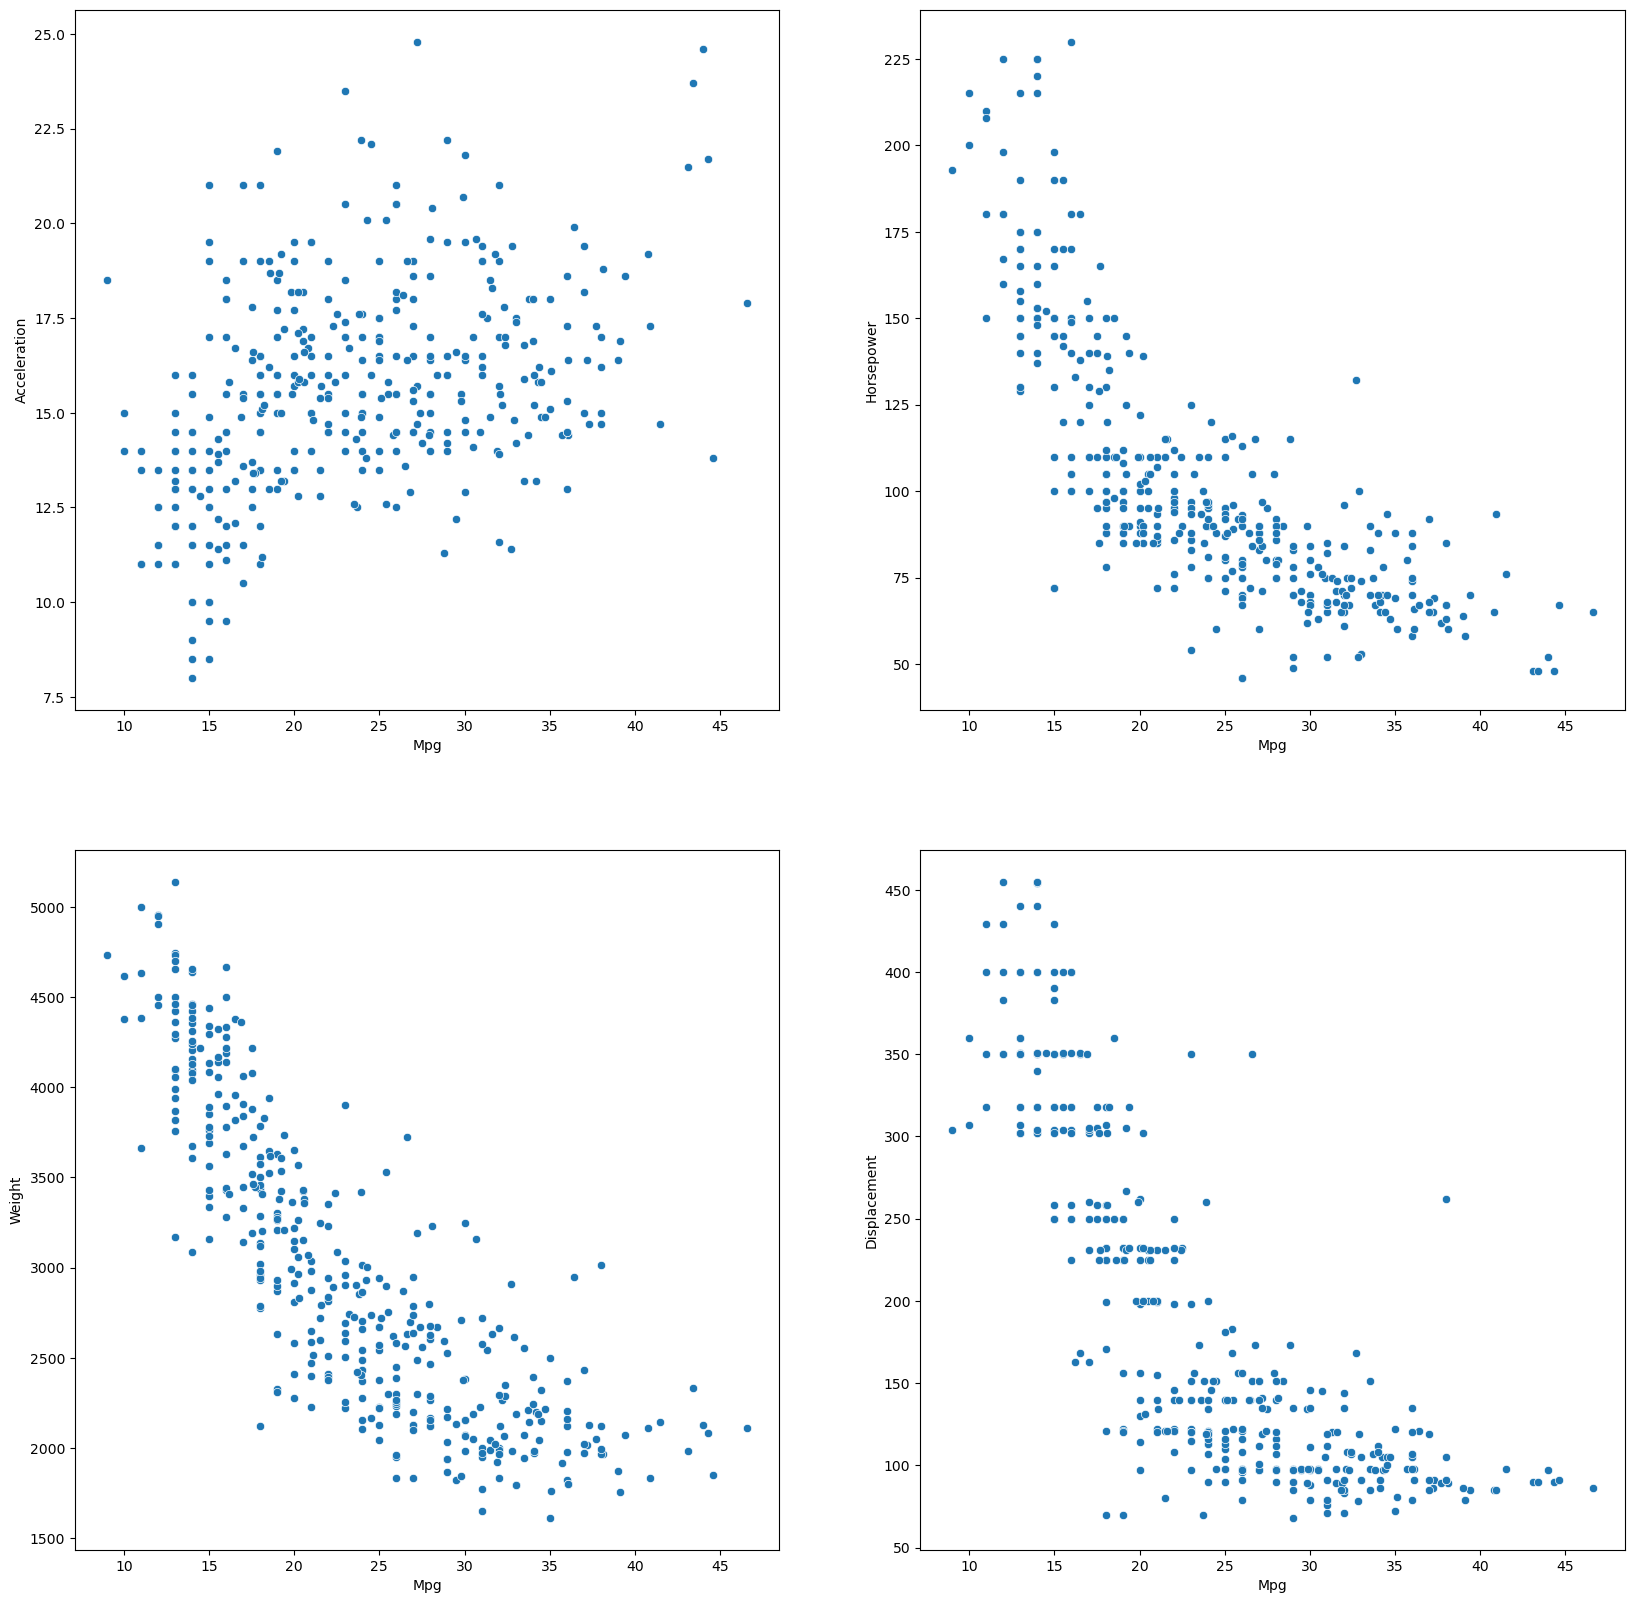

In [27]:
#Relationship between "Acceleration", "Horsepower", "Weight", "Displacement" with "Mpg"
plt.figure(figsize=(20,20))
col = ["Acceleration", "Horsepower", "Weight", "Displacement"]
for i, col in enumerate(col):
    plt.subplot(2,2,i+1)
    sns.scatterplot(y=df[col],x=df['Mpg'])

**Mpg** is negatively correlated with **Horsepower**,**Weight** and **Displacement**

<AxesSubplot:xlabel='Cylinders', ylabel='Mpg'>

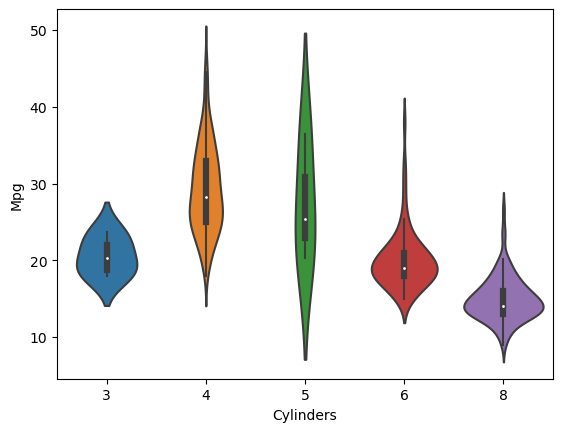

In [28]:
#Distribution of cylinders with mpg
sns.violinplot(data=df,y="Mpg",x="Cylinders")

Cars with 4 and 5 cylinders have the more distribution and mean for mpg

<AxesSubplot:xlabel='Model Year', ylabel='Mpg'>

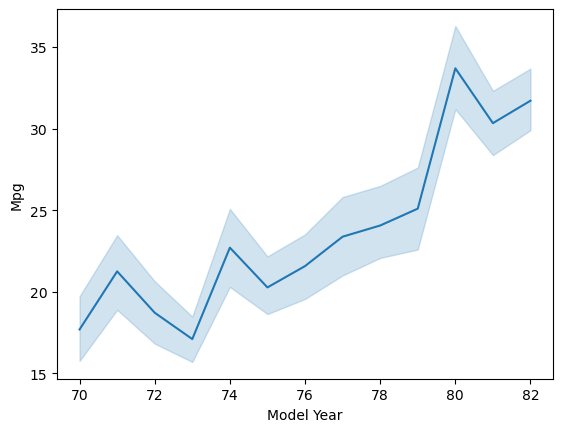

In [29]:
#Relationship between MPG and Year Model
sns.lineplot(x=df["Model Year"],y=df['Mpg'])

With increase in the **Model Year** ,value of mpg also increasing

<AxesSubplot:xlabel='Model Year', ylabel='Mpg'>

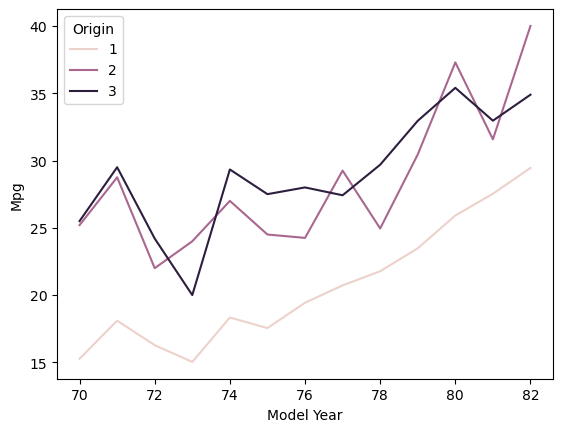

In [30]:
#relationship of MPG and Model Year with Origin
sns.lineplot(data=df , y= "Mpg", x="Model Year",hue= "Origin",ci=None)

Origin 1 has lower mpg then 2 and 3 with increasing year, overall increases

### Spliting independent and dependent feature

In [31]:
X =  df.drop('Mpg', axis=1)
y = df.Mpg

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=45)

In [33]:
for data in (X_train,X_test,y_train,y_test):
    print(data.shape)

(318, 7)
(80, 7)
(318,)
(80,)


In [34]:
X_train.Cylinders.value_counts()/len(X_train)

4    0.512579
8    0.251572
6    0.220126
3    0.009434
5    0.006289
Name: Cylinders, dtype: float64

In [35]:
X_test.Cylinders.value_counts()/len(X_test)

4    0.5125
8    0.2875
6    0.1750
5    0.0125
3    0.0125
Name: Cylinders, dtype: float64

Scaling the data after train test split (if we split the data before train test split there may be chance of data leakage)

### Scaling the data

In [36]:
# scale_feature = ['Cylinders','Displacement','Horsepower','Weight','Acceleration','Model Year']

In [37]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train[scale_feature] = scaler.fit_transform(X_train[scale_feature])


In [38]:
# X_test[scale_feature] = scaler.transform(X_test[scale_feature])

In [39]:
# X_train.head()

### Selecting and Training Model

In [40]:
regs = [LinearRegression(), Ridge(), Lasso(), ElasticNet(),DecisionTreeRegressor(),SVR(),KNeighborsRegressor(),
       GradientBoostingRegressor(), AdaBoostRegressor(), RandomForestRegressor()]

In [41]:
model_name = []
model_score = []
for reg in regs:
    y_pred = cross_val_predict(reg, X_train, y_train, cv = 3)
    model_name.append(reg)
    model_score.append(r2_score(y_train, y_pred))

In [42]:
final = pd.DataFrame({"ModelName": model_name,"Score": model_score})

In [43]:
final.sort_values(ascending=False,by = "Score", inplace = True)
final

,ModelName,Score
9,RandomForestRegressor(),0.865373
7,GradientBoostingRegressor(),0.863744
8,AdaBoostRegressor(),0.846487
1,Ridge(),0.808426
0,LinearRegression(),0.808366
2,Lasso(),0.808313
3,ElasticNet(),0.807149
4,DecisionTreeRegressor(),0.785525
6,KNeighborsRegressor(),0.719638
5,SVR(),0.668618


### Linear Regression

In [44]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [45]:
##testing the predictions with the 
sample_data = X_train.iloc[:5]
sample_labels = y_train.iloc[:5]


print("Prediction of samples: ", lin_reg.predict(sample_data))

Prediction of samples:  [16.63666933 21.14921641 20.03615023 24.18083411 26.10249372]


In [46]:

print("Actual Labels of samples: ", list(sample_labels))

Actual Labels of samples:  [16.0, 20.5, 19.4, 23.0, 24.0]


In [47]:
lin_reg.score(sample_data,sample_labels)

0.8235231929157653

### Gradient Boosting Regressor

In [48]:
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train, y_train)
gb_cv_scores = cross_val_score(gb_reg,X_train,y_train,scoring='neg_mean_squared_error',cv = 10)

gb_rmse_scores = np.sqrt(-gb_cv_scores)
gb_rmse_scores.mean()



2.8751415331328602

In [49]:
gb_reg.score(X_test,y_test)

0.8404741919118515

### Support Vector Machine Regressor

In [50]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='linear')
svm_reg.fit(X_train, y_train)

SVR(kernel='linear')

In [51]:
svm_cv_scores = cross_val_score(svm_reg, X_train, y_train,scoring='neg_mean_squared_error',cv = 10)
svm_rmse_scores = np.sqrt(-svm_cv_scores)
svm_rmse_scores.mean()

5.074673814747137

### Hyperparameter Tuning using GridSearchCV

In [52]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=4)

grid_search = GridSearchCV(forest_reg, param_grid,
                           scoring='neg_mean_squared_error',
                           return_train_score=True,
                           cv=10,
                          )

grid_search.fit(X_train, y_train)

grid_search.best_params_

cv_scores = grid_search.cv_results_

##### printing all the parameters along with their scores

In [53]:
for mean_score, params in zip(cv_scores['mean_test_score'], cv_scores["params"]):
    print(np.sqrt(-mean_score), params)

3.570080816806598 {'max_features': 2, 'n_estimators': 3}
3.106058123495479 {'max_features': 2, 'n_estimators': 10}
2.921624314040475 {'max_features': 2, 'n_estimators': 30}
3.266616983109118 {'max_features': 4, 'n_estimators': 3}
2.9503310930246016 {'max_features': 4, 'n_estimators': 10}
2.927634574811042 {'max_features': 4, 'n_estimators': 30}
3.3707250072310497 {'max_features': 6, 'n_estimators': 3}
3.092141254911001 {'max_features': 6, 'n_estimators': 10}
2.94818852806231 {'max_features': 6, 'n_estimators': 30}
3.4628811754009456 {'max_features': 8, 'n_estimators': 3}
3.1221247030332284 {'max_features': 8, 'n_estimators': 10}
2.9332696808144507 {'max_features': 8, 'n_estimators': 30}
3.124419318809353 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
2.9486005633618912 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
3.0635032553174315 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
2.9079048125317857 {'bootstrap': False, 'max_features': 3, 'n_estimato

In [54]:
grid_model = grid_search.best_estimator_

In [55]:
from sklearn.metrics import mean_squared_error
grid_predictions =grid_model.predict(X_test)
grid_mse = mean_squared_error(y_test, grid_predictions)
grid_rmse = np.sqrt(grid_mse)

In [56]:
grid_rmse

2.8893641168949267

In [57]:
grid_model.score(X_test, y_test)

0.8284754653095523

### XG_boost

In [58]:
# from xgboost import XGBRegressor
# xgb_reg = XGBRegressor()

In [59]:
# xgb_reg.fit(X_train,y_train)

In [60]:
# xgb_reg.score(X_test,y_test)

### Random Forest model

In [61]:
forest_reg = RandomForestRegressor(random_state=4)
forest_reg.fit(X_train, y_train)
forest_reg_cv_scores = cross_val_score(forest_reg,
                                         X_train,
                                         y_train,
                                         scoring='neg_mean_squared_error',
                                         cv = 10)

forest_reg_rmse_scores = np.sqrt(-forest_reg_cv_scores)
forest_reg_rmse_scores.mean()

2.816395113660218

In [62]:
forest_reg.score(X_test,y_test)

0.8493223500109919

### Final Model

In [63]:
final_model = RandomForestRegressor(random_state=4)
final_model.fit(X_train, y_train)

RandomForestRegressor(random_state=4)

### Save the Model

In [64]:
import pickle

In [65]:
# saving the model
import pickle
filename = 'my_model.pkl'
pickle.dump(final_model, open(filename, 'wb'))

In [66]:
load_model = pickle.load(open(filename,'rb'))

In [67]:
load_model.predict([[8,165,98,2600,16,78,1]])

array([22.191])